Largeur bande  interdite: 0.44120000000000026


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

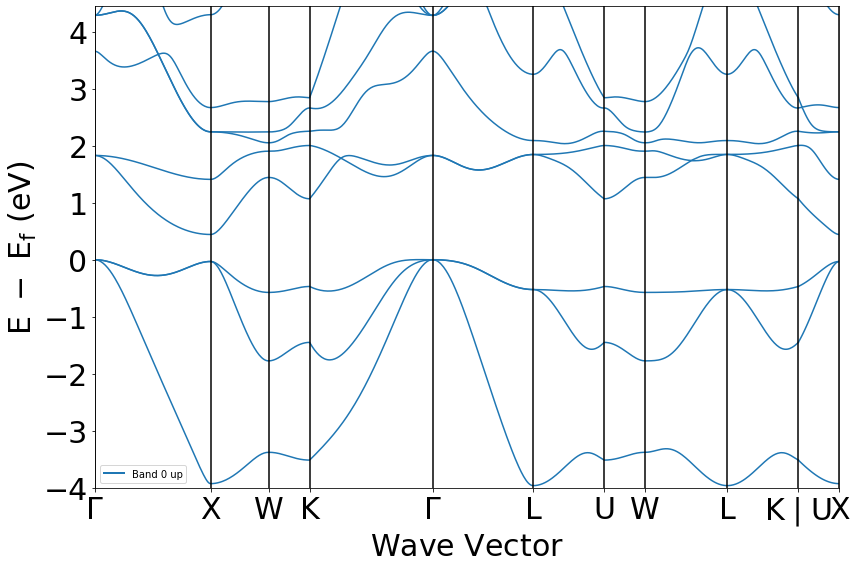

In [4]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from pymatgen.electronic_structure import bandstructure as bs
from pymatgen.electronic_structure import plotter as pl
import matplotlib.pyplot as plt
import numpy as np

with MPRester("HrfUZDx1jL7J7TxiIVp") as m:

    Struct = m.get_bandstructure_by_material_id("mp-961693")
    
    
Bande = Struct.get_band_gap()["energy"]
print("Largeur bande  interdite:",Bande)
pl.BSPlotter(Struct).get_plot()

In [15]:
data = pl.BSPlotter(Struct).bs_plot_data()
dEdk_val = []
dEdk_cond = []
for i in range(len(data['distances'])) :  
    dk = data['distances'][i][0]-data['distances'][i][-1]
    dE_val = data["energy"]['1'][i][9][0]-data["energy"]['1'][i][9][-1]
    dE_cond = data["energy"]['1'][i][10][0]-data["energy"]['1'][i][10][-1]    
    dEdk_val.append(abs(dE_val/dk))
    dEdk_cond.append(abs(dE_cond/dk))
 
print("La direction de la dernière bande de valence avec la plus grande dispersion =",
      data['distances'][dEdk_val.index(max(dEdk_val))][0],
      "1/A vers k=",data['distances'][dEdk_val.index(max(dEdk_val))][-1],"1/A")
print("La direction de la dernière bande de valence avec la plus petite dispersion =",data['distances'][dEdk_val.index(min(dEdk_val))][0]," à",
     data['distances'][dEdk_val.index(min(dEdk_val))][-1],"[1/A]")
print("La direction de la premiere bande de conduction avec la plus grande dispersion =",data['distances'][dEdk_cond.index(max(dEdk_cond))][0]," à",
     data['distances'][dEdk_cond.index(max(dEdk_cond))][-1],"[1/A]")
print("La direction de la premiere bande de conduction avec la plus petite dispersion =",data['distances'][dEdk_cond.index(min(dEdk_cond))][0]," à",
     data['distances'][dEdk_cond.index(min(dEdk_cond))][-1],"[1/A]")

La direction de la dernière bande de valence avec la plus grande dispersion = 2.8060854595591462 1/A vers k= 3.6399781174427646 1/A
La direction de la dernière bande de valence avec la plus petite dispersion = 4.229629270614055  à 4.570064522625409 1/A
La direction de la premiere bande de conduction avec la plus grande dispersion = 4.570064522625409  à 5.250935026648117 1/A
La direction de la premiere bande de conduction avec la plus petite dispersion = 2.8060854595591462  à 3.6399781174427646 1/A


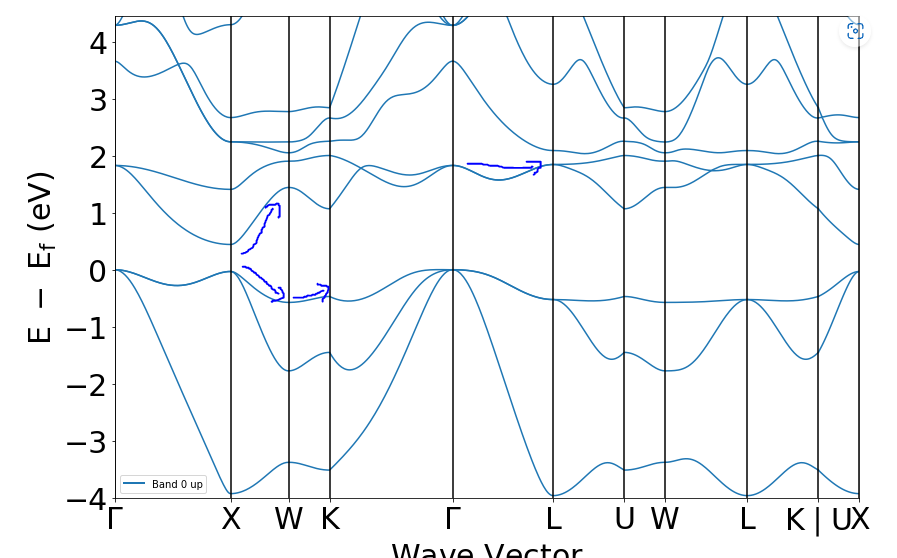

In [13]:
k= [0.0]
E_cond= [data["energy"]['1'][0][10][0]]
E_val = [0.0]

for i in range(len(data['distances'])-1):
    k.append(data['distances'][i][0])
    E_val.append(data["energy"]['1'][i+1][9][0]) 
    E_cond.append(data["energy"]['1'][i+1][10][0])

print(E_val)
print(E_cond)

def mass_eff(k, E):
    poly_fit = np.polyfit(k,E, 2)
    h = 1.05371737*10**(-34)  
    return pow(h,2)/(2*poly_fit[0]*(1.602176565e-19)*10e-20) 


Ec1=[data["energy"]['1'][1][10][-2],E_cond[2],data["energy"]['1'][2][10][1]]
Ec2=[data["energy"]['1'][7][10][-2],E_cond[8],data["energy"]['1'][8][10][1]]

kc1=[data['distances'][1][-2],data['distances'][2][0],data['distances'][2][1]]
kc2=[data['distances'][7][-2],data['distances'][8][0],data['distances'][8][1]]

Ev1=[E_val[0],data["energy"]['1'][0][9][1],data["energy"]['1'][0][9][2]]
Ev2=[data["energy"]['1'][2][9][-2],E_val[3],data["energy"]['1'][3][9][1]]

kv1=[data['distances'][0][0],data['distances'][0][1],data['distances'][0][2]] 
kv2=[data['distances'][2][-2],data['distances'][3][0],data['distances'][3][1]]


print("\nLes masses effectives aux sommets de la dernière bande de valence valent :",mass_eff(kv1,Ev1)
      ,mass_eff(kv2,Ev2))
print("\nLes masses effectives aux bases de la dernière bande de conduction valent :",mass_eff(kc1,Ec1)
      ,mass_eff(kc2,Ec2),)

[0.0, -6.459099999999999, -6.4338999999999995, -6.442699999999999, -8.2949, -6.6213, -6.442699999999999, -6.4338999999999995, -6.6213, -6.442699999999999]
[-5.140899999999999, -5.237, -5.2953, -5.234299999999999, -5.140899999999999, -5.1350999999999996, -5.234299999999999, -5.2953, -5.1350999999999996, -5.234299999999999]

Les masses effectives aux sommets de la dernière bande de valence valent : 8.231809990064745e-36 -6.882311004998585e-31

Les masses effectives aux bases de la dernière bande de conduction valent : 3.0469917757439707e-20 -1.7085847393373368e-31
